# Color Space Test

https://en.wikipedia.org/wiki/HSL_and_HSV#Lightness

In [1]:
import random
import glob
from ipynb.fs.full.ParkingSpaceDetector import *
path = 'E:\\OneDrive - UNIVERSIDAD DE HUELVA\TFG\PKLot\PKLot\PKLot\\UFPR04'
files = glob.glob(path+ '/**/*.jpg', recursive=True)            # Get all images in path
selected_files = random.choices(files, k=int(len(files)/10))    # Select n random images from dataset

#Define global params for each parking
PARAMS_UFPR04 = DetectionParams((5, 5), 0, cv.ADAPTIVE_THRESH_GAUSSIAN_C, 29, 8, 3, 23, vacant_threshold=0.26)  # UFPR04

row_names = list()
precision_total = list()  # Preicisón: Tasa de TP, lo bien que predice hueco libre sin obtener falsos positivos
specificity_total = list() # Especificdad: Tasa de TN, 
recall_total = list()     # Sensibilidad: la proporción de huecos libres que detectan y no se le escapan
f1_total = list()
accuracy_total = list()

## Grayscale
##### Intensity is defined as the arithmetic mean of RGB channels

Processing 379 files with 12 cores


100%|██████████| 379/379 [01:36<00:00,  3.95it/s]


Precision: 0.908
specificity: 0.889
Recall: 0.843
F1 Score: 0.874
Accuracy: 0.863


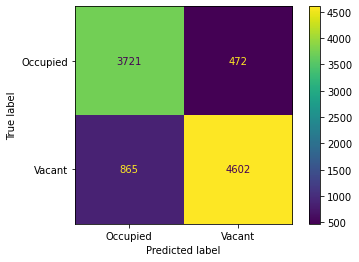

In [2]:
PARAMS_UFPR04.channel = "g"

confusion_matrix, real, predicted = process_batch(selected_files, PARAMS_UFPR04)
precision, specificity, recall, f1, accuracy = show_confusion_matrix(confusion_matrix, real, predicted)

precision_total.append(precision)
specificity_total.append(specificity)
recall_total.append(recall)
f1_total.append(f1)
accuracy_total.append(accuracy)
row_names.append(f"Channel 'G'ray")

## Lightness channel of HLS
####  Lightness is defined as the average of the largest and smallest color components

Processing 379 files with 12 cores


100%|██████████| 379/379 [01:36<00:00,  3.92it/s]

Precision: 0.908
specificity: 0.887
Recall: 0.860
F1 Score: 0.883
Accuracy: 0.872


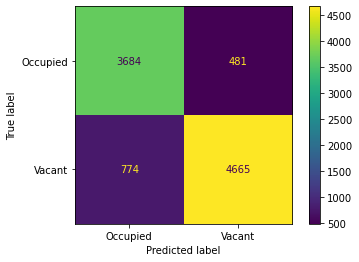

In [3]:
PARAMS_UFPR04.channel = "l"

confusion_matrix, real, predicted = process_batch(selected_files, PARAMS_UFPR04)
precision, specificity, recall, f1, accuracy = show_confusion_matrix(confusion_matrix, real, predicted)

precision_total.append(precision)
specificity_total.append(specificity)
recall_total.append(recall)
f1_total.append(f1)
accuracy_total.append(accuracy)
row_names.append(f"Channel HS'L'")

## Value channel of HSV
#### value is defined as the largest component of a color

Processing 379 files with 12 cores


100%|██████████| 379/379 [01:42<00:00,  3.71it/s]


Precision: 0.916
specificity: 0.898
Recall: 0.853
F1 Score: 0.883
Accuracy: 0.873


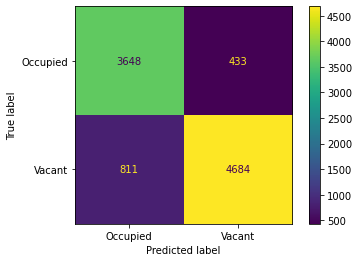

In [4]:
PARAMS_UFPR04.channel = "v"

confusion_matrix, real, predicted = process_batch(selected_files, PARAMS_UFPR04)
precision, specificity, recall, f1, accuracy = show_confusion_matrix(confusion_matrix, real, predicted)

precision_total.append(precision)
specificity_total.append(specificity)
recall_total.append(recall)
f1_total.append(f1)
accuracy_total.append(accuracy)
row_names.append(f"Channel HS'V'")

In [7]:
import pandas as pd

data = {
  "precision": precision_total,
  "specificity": specificity_total,
  "recall": recall_total,
  "f1": f1_total,
  "accuracy": accuracy_total
}

df = pd.DataFrame(data, index = row_names)

print(df.round(3)) 

                precision  specificity  recall     f1  accuracy
Channel 'G'ray      0.908        0.889   0.843  0.874     0.863
Channel HS'L'       0.908        0.887   0.860  0.883     0.872
Channel HS'V        0.916        0.898   0.853  0.883     0.873
